In [24]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import xgboost
from scipy.stats import stats

# Libaries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Library to split data
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import joblib

# To avoid future warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset

# df_load = pd.read_csv('winequality-white.csv', sep=';')
# df_load.head()

def load_data(file_path):
    """Load dataset fron a csv file"""
    return pd.read_csv(file_path, sep=';')

df_load = load_data('winequality-white.csv')

df_load.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [11]:
df_wine = df_load.copy()

In [12]:
df_wine.describe().T.style.background_gradient(axis=0)

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.000000,6.854788,0.843868,3.800000,6.300000,6.800000,7.300000,14.200000
volatile acidity,4898.000000,0.278241,0.100795,0.080000,0.210000,0.260000,0.320000,1.100000
citric acid,4898.000000,0.334192,0.121020,0.000000,0.270000,0.320000,0.390000,1.660000
residual sugar,4898.000000,6.391415,5.072058,0.600000,1.700000,5.200000,9.900000,65.800000
chlorides,4898.000000,0.045772,0.021848,0.009000,0.036000,0.043000,0.050000,0.346000
free sulfur dioxide,4898.000000,35.308085,17.007137,2.000000,23.000000,34.000000,46.000000,289.000000
total sulfur dioxide,4898.000000,138.360657,42.498065,9.000000,108.000000,134.000000,167.000000,440.000000
density,4898.000000,0.994027,0.002991,0.987110,0.991723,0.993740,0.996100,1.038980
pH,4898.000000,3.188267,0.151001,2.720000,3.090000,3.180000,3.280000,3.820000
sulphates,4898.000000,0.489847,0.114126,0.220000,0.410000,0.470000,0.550000,1.080000


In [15]:


def explore_data(df_wine):
    """
    Displays key information about a dataset:
    - Info (columns, dtypes, non-null counts)
    - Summary statistics
    - Missing values (sum)
    - Duplicates (sum)
    """
    # Column Data Info
    print("DATA INFO")
    print("-" * 40)
    df_wine.info()

    print("\nDESCRIPTIVE STATISTICS")
    print("-" * 40)
    display(df_wine.describe(include='all').T)  
    
    print("\MISSING VALUES (sum)")
    print("-" * 40)
    print(df_wine.isnull().sum())
    
    print("\nDUPLICATES (sum)")
    print("-" * 40)
    print(df_wine.duplicated().sum())
    
    summary = {
        "shape": df_wine.shape,
        "missing_values": df_wine.isnull().sum().sum(),
        "duplicates": df_wine.duplicated().sum(),
        "columns": df_wine.columns.tolist()
    }
    
    return summary

summary = explore_data(df_wine)

DATA INFO
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB

DESCRIPTIVE STATISTICS
----------------------------------------


,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


\MISSING VALUES (sum)
----------------------------------------
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

DUPLICATES (sum)
----------------------------------------
937


In [22]:
# # Encoding Quality feature
# df_wine["quality"] = df_wine["quality"].map({9: "Excellent", 8: "Very good", 7: "Very good", 6: "Good", 5: "Good",
#                                    4: "Bad", 3: "Bad"})
# df_wine["quality"]


# Define the mapping function
def quality_label(quality):
    if quality >= 9:
        return "Excellent"
    elif quality >= 7:
        return "Very good"
    elif quality >= 5:
        return "Good"
    elif quality >= 3:
        return "Bad"
    else:
        return "Unknown"  # handles unexpected values

# Apply the function to the 'quality' column
df_wine["quality"] = df_wine["quality"].apply(quality_label)

# Check the result
df_wine["quality"].value_counts()


quality
Good         3655
Very good    1055
Bad           183
Excellent       5
Name: count, dtype: int64

#### Data Preprocessing

In [1]:
# X = df_wine.drop(columns='quality')
# y = df_wine.quality

def split_features_target(df_wine, target_column):
    """
    Splits a DataFrame into features (X) and target (y).

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    target_column (str): The name of the target column.

    Returns:
    X (pd.DataFrame): Features (all columns except target).
    y (pd.Series): Target column.
    """
    X = df_wine.drop(columns=target_column)
    y = df_wine[target_column]
    return X, y

# Usage
X, y = split_features_target(df_wine, 'quality')


NameError: name 'df_wine' is not defined

In [ ]:
# Lets scale the features

# scaler = MinMaxScaler(feature_range=(0,1))
# X_scaled = scaler.fit_transform(X)

# # Scale numeric features using sklearn standard scaler
# num_cols = [x for x in df_wine.columns if df_wine[x].dtype == "float64"]
# # Initialize the scaler
# scaler = StandardScaler()
# Fit the scaler to the features and transform them
# df_wine[num_cols] = scaler.fit_transform(df_wine[num_cols])


# def scale_features_minmax(X):
#     """
#     Scales features using MinMaxScaler.
    
#     Parameters:
#     X (pd.DataFrame): Features DataFrame
    
#     Returns:
#     pd.DataFrame: Scaled features with original column names
#     """
#     scaler = MinMaxScaler()
#     X_scaled_array = scaler.fit_transform(X)
#     X_scaled = pd.DataFrame(X_scaled_array, columns=X.columns, index=X.index)
#     return X_scaled

# # Usage
# X_scaled = scale_features_minmax(X)



def scale_features_standard(X):
    """
    Scales features using StandardScaler.
    
    Parameters:
    X (pd.DataFrame): Features DataFrame
    
    Returns:
    pd.DataFrame: Scaled features with original column names
    """
    scaler = StandardScaler()
    X_scaled_array = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled_array, columns=X.columns, index=X.index)
    return X_scaled, scaler

# Usage
X_scaled, scaler = scale_features_standard(X)


In [ ]:
# Splitting
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=234)


def split_train_test(X, y, test_size=0.2, random_state=234):
    """
    Splits features and target into train and test sets.
    
    Parameters:
    X (pd.DataFrame): Features DataFrame
    y (pd.Series): Target column
    test_size (float): Proportion of the test set
    random_state (int): Random seed for reproducibility
    
    Returns:
    X_train, X_test, y_train, y_test
    """
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    return X_train, X_test, y_train, y_test

# Usage
X_train, X_test, y_train, y_test = split_train_test(X_scaled, y, test_size=0.2, random_state=234)



Training Logistic Regression...
Logistic Regression Evaluation Metrics
Accuracy score: 0.7786
Classification Report:
              precision    recall  f1-score   support

         Bad       0.80      0.10      0.18        39
   Excellent       0.00      0.00      0.00         1
        Good       0.80      0.94      0.87       741
   Very good       0.60      0.30      0.40       199

    accuracy                           0.78       980
   macro avg       0.55      0.34      0.36       980
weighted avg       0.76      0.78      0.74       980



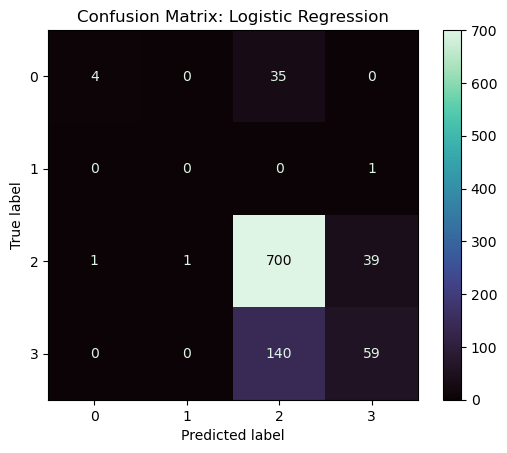


Training Decision Tree...
Decision Tree Evaluation Metrics
Accuracy score: 0.8000
Classification Report:
              precision    recall  f1-score   support

         Bad       0.32      0.31      0.32        39
   Excellent       0.00      0.00      0.00         1
        Good       0.87      0.87      0.87       741
   Very good       0.63      0.62      0.63       199

    accuracy                           0.80       980
   macro avg       0.46      0.45      0.45       980
weighted avg       0.80      0.80      0.80       980



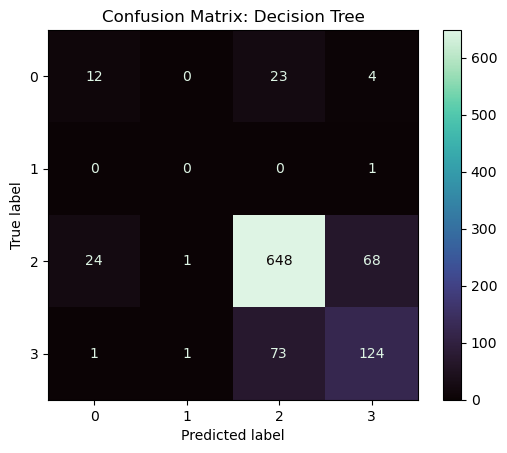


Training Naive Bayes Classifier...
Naive Bayes Classifier Evaluation Metrics
Accuracy score: 0.6827
Classification Report:
              precision    recall  f1-score   support

         Bad       0.26      0.31      0.28        39
   Excellent       0.00      0.00      0.00         1
        Good       0.87      0.70      0.77       741
   Very good       0.42      0.71      0.53       199

    accuracy                           0.68       980
   macro avg       0.39      0.43      0.39       980
weighted avg       0.75      0.68      0.70       980



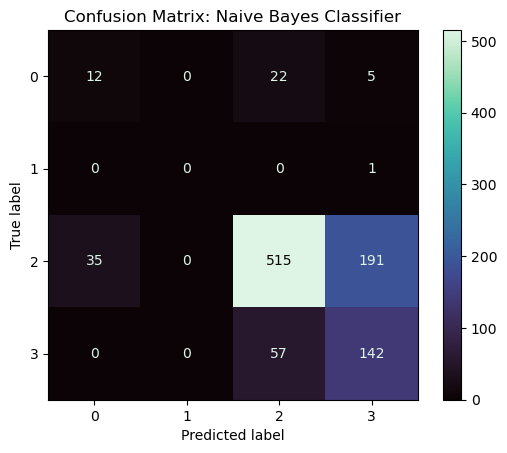


Training Random Forest...
Random Forest Evaluation Metrics
Accuracy score: 0.8643
Classification Report:
              precision    recall  f1-score   support

         Bad       1.00      0.05      0.10        39
   Excellent       0.00      0.00      0.00         1
        Good       0.86      0.98      0.92       741
   Very good       0.88      0.60      0.71       199

    accuracy                           0.86       980
   macro avg       0.69      0.41      0.43       980
weighted avg       0.87      0.86      0.84       980



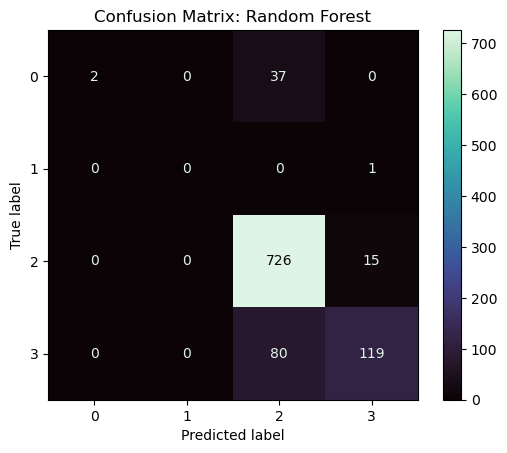


Training K-Nearest Neighbors...
K-Nearest Neighbors Evaluation Metrics
Accuracy score: 0.8143
Classification Report:
              precision    recall  f1-score   support

         Bad       0.33      0.05      0.09        39
   Excellent       0.00      0.00      0.00         1
        Good       0.85      0.92      0.88       741
   Very good       0.66      0.57      0.61       199

    accuracy                           0.81       980
   macro avg       0.46      0.39      0.40       980
weighted avg       0.79      0.81      0.80       980



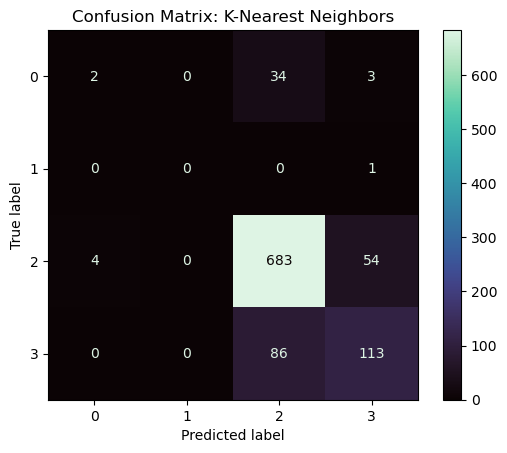

In [ ]:
# Modelling
# models = {"Logistic Regression": LogisticRegression(random_state=0),
#           "Decision Tree": DecisionTreeClassifier(random_state=0),
#           "Naive Bayes Classifier": GaussianNB(),
#           "SVM": RandomForestClassifier(random_state=0),
#           "K-Nearest Neighbors": KNeighborsClassifier()
#           }


# # Initialize a dictionary to store the models 
# results = {}
# for model_name, model in models.items():
#     print(f"Training {model_name}")
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     print(f"{model_name} Evaluation Metrics")
#     print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")
#     print(f"Classification Report: \n {classification_report(y_test, y_pred)}")
#     results[f"{model_name} Accuracy": {accuracy_score(y_test, y_pred)}]
    
#     # Lets include confusion matrix
#     cm = confusion_matrix(y_test, y_pred)
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
#     # Plot with model name as title
#     disp.plot(cmap='Blues')
#     plt.title(f"Confusion Matrix: {model_name}")
#     plt.show()



def train_evaluate_models(models, X_train, X_test, y_train, y_test):
    """
    Trains and evaluates multiple classification models.

    Parameters:
    models (dict): Dictionary of model_name: model_object
    X_train, X_test, y_train, y_test: Training and testing data

    Returns:
    results (dict): Dictionary of model_name: accuracy_score
    """
    results = {}  # store accuracy for each model

    for model_name, model in models.items():
        print(f"\nTraining {model_name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Evaluation metrics
        acc = accuracy_score(y_test, y_pred)
        print(f"{model_name} Evaluation Metrics")
        print(f"Accuracy score: {acc:.4f}")
        print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
        
        # Store accuracy
        results[model_name] = acc
        
        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap='mako')
        plt.title(f"Confusion Matrix: {model_name}")
        plt.show()
    
    return results

# Usage
models = {
    "Logistic Regression": LogisticRegression(random_state=0),
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "Naive Bayes Classifier": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=0),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

results = train_evaluate_models(models, X_train, X_test, y_train, y_test)


1. Overall Accuracy

Accuracy: 0.8643 (≈86%)

This indicates that the model correctly predicts the wine quality for about 86% of the samples in the test set.

While accuracy is decent, in a multiclass imbalanced dataset, it’s important to also consider class-wise performance rather than relying on accuracy alone.


2. Confusion Matrix Analysis

My confusion matrix shows the distribution of predictions:

| True \ Pred   | Bad (0) | Excellent (1) | Good (2) | Very good (3) |
| ------------- | ------- | ------------- | -------- | ------------- |
| **Bad**       | 2       | 0             | 37       | 0             |
| **Excellent** | 0       | 0             | 0        | 1             |
| **Good**      | 0       | 0             | 726      | 15            |
| **Very good** | 0       | 0             | 80       | 119           |



- Good wines (label 2) are predicted very well: 726/741 correctly classified → Recall ≈ 98%

- Very good wines (label 3): Some misclassification into Good (80 samples), recall ≈ 60%

- Bad wines (label 0): Mostly misclassified as Good → only 2 correct predictions out of 39 → poor recall

- Excellent wines (label 1): Only 1 sample, misclassified → difficult to evaluate due to extremely small support

Interpretation:

- The model is excellent at predicting the majority class (Good), but struggles with rare classes (Bad and Excellent).

- This is typical for imbalanced datasets.


3. Classification Report Insights

- Weighted F1-score: 0.84 → good overall predictive ability.

- Macro F1-score: 0.43 → highlights poor performance on minority classes.

- Precision & Recall:

   - Good wines: Precision 0.86, Recall 0.98 → strong performance

   - Very good wines: Precision 0.88, Recall 0.60 → moderate performance

   - Bad wines: Precision 1.0, Recall 0.05 → very poor detection

   - Excellent wines: Precision/Recall = 0 → essentially undetected

Interpretation:

- The model is biased toward the majority class (Good), which is common in imbalanced datasets.

- Random Forest is still a good starting point because:

    - It handles multiclass problems natively

    - Can capture non-linear relationships between features

   - Robust to overfitting with proper tuning



4. **Why pick Random Forest for Hyperparameter Tuning**

a. Strong baseline performance: Accuracy 86%, weighted F1-score 0.84 — higher than simpler models (e.g., Logistic Regression, Naive Bayes) in your previous tests.

b. Handles feature interactions: Random Forest can capture complex patterns that linear models cannot.

c. Robust to overfitting: With tuning of n_estimators, max_depth, min_samples_split, etc., you can improve minority class detection.

d. Supports feature importance: After tuning, you can identify which wine characteristics most influence quality.

e. Flexibility with class imbalance: Can use class_weight='balanced' or techniques like SMOTE to improve minority class predictions.


5. Next Steps for Hyperparameter Tuning

 - Focus on increasing recall for minority classes (Bad and Excellent) without sacrificing overall accuracy.

 - Tune parameters such as:

   - n_estimators (number of trees)

   - max_depth (depth of trees)

   - min_samples_split and min_samples_leaf

   - max_features (number of features considered for splitting)

- Consider class balancing techniques like class_weight='balanced' or oversampling minority classes.



Summary for report:

“The Random Forest model achieves the highest overall accuracy and weighted F1-score among the tested models. While it performs exceptionally well on the majority class (‘Good’ wines), it struggles with minority classes (‘Bad’ and ‘Excellent’ wines). Its ability to model complex, non-linear relationships and robustness against overfitting make it an ideal candidate for hyperparameter tuning. By adjusting tree depth, number of trees, and using class balancing strategies, we aim to improve minority class detection and overall model performance.”

In [ ]:
# Hyperparameter tuning

# Lets get parameters for forest
# rf = RandomForestClassifier()
# rf.get_params()

def get_rf_params(**kwargs):
    """
    Create a RandomForestClassifier with optional hyperparameters and return its parameters.
    
    Args:
        **kwargs: Any hyperparameters for RandomForestClassifier (like n_estimators, max_depth, etc.)
        
    Returns:
        dict: Parameters of the RandomForestClassifier instance
    """
    rf = RandomForestClassifier(**kwargs)
    return rf.get_params()

get_rf_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# The params in the lists are reasonable guesses. However, we can try ranges

# param_dist = {
#    "n_estimators": randint(50, 200),
#    "max_depth": randint(10, 30),
#    "min_samples_split": randint(2, 10),
#    "min_samples_leaf": randint(1, 4)
# }

In [ ]:
#  # Lets tune Random Forest - Hyperparameters
 
# param_grid = {
#     "n_estimators": [50, 100, 200],
#     "max_depth": [10, 20, 30],
#     "min_samples_split": [2, 5, 10],
#     "min_samples_leaf": [1, 2, 4]
#  }


# # Lets define GridSearchCV
# grid_search = GridSearchCV(RandomForestClassifier(random_state=234), param_grid=param_grid, cv = 5, n_jobs= -1, verbose = 1)
# grid_search.fit(X_train, y_train)
# print(f"Best parameters for Random Forest: {grid_search.best_params_}")

# # Hyperparameter grid (same as before)
# param_grid = {
#     "n_estimators": [50, 100, 200],
#     "max_depth": [10, 20, 30],
#     "min_samples_split": [2, 5, 10],
#     "min_samples_leaf": [1, 2, 4]
# }

# # Define RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=RandomForestClassifier(random_state=234),
#     param_distributions=param_grid,
#     n_iter=30,              # number of random combinations to try
#     cv=5,                   # 5-fold cross-validation
#     n_jobs=-1,
#     verbose=1,
#     random_state=234         # for reproducibility
# )

# # Fit to training data
# random_search.fit(X_train, y_train)

# # Best parameters
# print(f"Best parameters for Random Forest (RandomizedSearchCV): {random_search.best_params_}")



In [ ]:
# Hyperparameter tuning function

def tune_random_forest_randomized(X_train, y_train, param_grid=None, n_iter=30, cv=5, random_state=234, verbose=1):
    """
    Perform RandomizedSearchCV to tune hyperparameters of a RandomForestClassifier.
    
    Args:
        X_train (pd.DataFrame or np.array): Training features
        y_train (pd.Series or np.array): Training labels
        param_grid (dict, optional): Hyperparameter grid. Uses default if None.
        n_iter (int): Number of random parameter combinations to try
        cv (int): Number of cross-validation folds
        random_state (int): Random seed for reproducibility
        verbose (int): Verbosity level for RandomizedSearchCV
        
    Returns:
        best_model: Fitted RandomForestClassifier with best parameters
        best_params: Dictionary of best hyperparameters
    """
    if param_grid is None:
        param_grid = {
            "n_estimators": [50, 100, 200],
            "max_depth": [10, 20, 30],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        }
    
    rf = RandomForestClassifier(random_state=random_state)
    
    random_search = RandomizedSearchCV(
        estimator=rf,
        param_distributions=param_grid,
        n_iter=n_iter,
        cv=cv,
        n_jobs=-1,
        verbose=verbose,
        random_state=random_state
    )
    
    random_search.fit(X_train, y_train)
    
    best_model = random_search.best_estimator_
    best_params = random_search.best_params_
    
    print(f"Best parameters for Random Forest (RandomizedSearchCV): {best_params}")
    
    return best_model, best_params

best_rf_model, best_rf_params = tune_random_forest_randomized(X_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters for Random Forest (RandomizedSearchCV): {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}


In [ ]:
# # Cross validation score for the best model- Random Forest
# Best_model = grid_search.best_estimator_
# cv_scores = cross_val_score(Best_model, X_scaled, y, cv=5)
# print(f"Cross-validation scores for Random Forest: {cv_scores}")
# print(f"Mean cross-validation score: {cv_scores.mean()}")



# # best_rf_model is the fitted best model from RandomizedSearchCV
# cv_scores = cross_val_score(best_rf_model, X_scaled, y, cv=5)

# print(f"Cross-validation scores for Random Forest: {cv_scores}")
# print(f"Mean cross-validation score: {cv_scores.mean()}")



In [ ]:
# Cross validation score for the best model- Random Fores

def evaluate_best_model(best_model, X_scaled, y, cv=5):
    """
    Compute cross-validation scores for a fitted estimator.
    
    Args:
        best_model: Fitted model (e.g., RandomForestClassifier)
        X (array-like or DataFrame): Features for cross-validation
        y (array-like or Series): Target labels
        cv (int): Number of cross-validation folds (default=5)
        
    Returns:
        cv_scores (np.array): Array of cross-validation scores
        mean_score (float): Mean of cross-validation scores
    """
    # Compute cross-validation scores
    cv_scores = cross_val_score(best_model, X_scaled, y, cv=cv)
    
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean cross-validation score: {cv_scores.mean()}")
    
    return cv_scores, cv_scores.mean()

cv_scores, mean_score = evaluate_best_model(best_rf_model, X_scaled, y)


Cross-validation scores: [0.7744898  0.75714286 0.80204082 0.76200204 0.73748723]
Mean cross-validation score: 0.7666325488315857


In [ ]:
# y_pred = best_rf_model.predict(X_test)
# print(f"\nClassification Report: ")
# print(classification_report(y_test, y_pred, zero_division=1))


def evaluate_classification_model(best_rf_model, X_test, y_test):
    """
    Make predictions using a fitted classification model and print the classification report.
    
    Args:
        model: Fitted classifier (e.g., RandomForestClassifier)
        X_test (array-like or DataFrame): Test features
        y_test (array-like or Series): True labels for the test set
        
    Returns:
        y_pred (np.array): Predicted labels
    """
    # Make predictions
    y_pred = best_rf_model.predict(X_test)
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=1))
    
    return y_pred

y_pred = evaluate_classification_model(best_rf_model, X_test, y_test)



Classification Report:
              precision    recall  f1-score   support

         Bad       0.67      0.05      0.10        39
   Excellent       1.00      0.00      0.00         1
        Good       0.87      0.98      0.92       741
   Very good       0.89      0.62      0.73       199

    accuracy                           0.87       980
   macro avg       0.86      0.41      0.44       980
weighted avg       0.86      0.87      0.85       980



**Model Evaluation Summary — Random Forest Classifier**

The Random Forest model achieved an overall accuracy of 87% on the test set, indicating strong general performance. However, a closer look at the precision, recall, and F1-scores for each class reveals important insights into how well the model performs across different quality levels.



| Class         | Precision | Recall | F1-score | Interpretation                                                                                                                                       |
| :------------ | :-------- | :----- | :------- | :--------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Bad**       | 0.67      | 0.05   | 0.10     | The model struggles to correctly identify “Bad” samples. It predicts this class rarely (low recall), meaning many actual “Bad” instances are missed. |
| **Excellent** | 1.00      | 0.00   | 0.00     | The model completely fails to detect “Excellent” samples, likely due to their very small number (only 1 sample).                                     |
| **Good**      | 0.87      | 0.98   | 0.92     | The model performs **very well** here — most “Good” samples are correctly classified, showing strong predictive power for the majority class.        |
| **Very good** | 0.89      | 0.62   | 0.73     | Decent performance, but recall (0.62) indicates some “Very good” samples are being misclassified as “Good.”                                          |



**Overall Metrics**

- Accuracy: 0.87 → 87% of all test samples were correctly classified.

- Macro Average F1 (0.44): Shows that performance across all classes is uneven — smaller classes are not well captured.

- Weighted Average F1 (0.85): Weighted by class size, so it’s dominated by the “Good” class, which explains the high overall score.


**Key Insights**

1. The model is biased toward the majority class (“Good”) — it performs best where data is abundant.

2. Minority classes (“Bad” and “Excellent”) are underrepresented, leading to poor recall and F1-scores for them.

3. To improve performance for minority classes, you could:

   - Use class balancing techniques (e.g., class_weight='balanced' in RandomForestClassifier).

   - Try SMOTE or other resampling methods.

   - Collect more samples of the rare classes.




**Conclusion**

The Random Forest model performs strongly overall, especially in predicting “Good” and “Very good” categories. However, its ability to recognize “Bad” and “Excellent” samples is limited, likely due to class imbalance. Future tuning or data balancing could help create a more equitable model across all categories.

In [ ]:
# Lets save our best model as a pickel file

joblib.dump(best_rf_model, 'best_random_forest_model.pkl')

# Lets save the scaler (standardscaler used for the feature scaling)
joblib.dump(scaler, 'scaler.pkl')
print("Model and scaler saved successfully.")

Model and scaler saved successfully.
